In [28]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import matplotlib.dates as mdates

EV = pd.read_csv("Data.csv", sep=';')
print(EV)
# Carregar os dados do arquivo Data.csv
EV = pd.read_csv("Data.csv", sep=";")
EV = EV.iloc[:, :33]
print(EV)

# Converter a coluna "Date" para o formato de data (considerando apenas a data)
EV['date'] = pd.to_datetime(EV['Start date'].str.split('|').str[0].str.strip(), format='%m/%d/%Y', errors='coerce')


# Carregar os dados do arquivo PLUS.csv
plus = pd.read_csv("PLUS.csv", sep=";")
plus = plus.drop(columns=['Unnamed: 2'])
# Converter a coluna "Date" para o formato de data (considerando apenas a data)
plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')


# Mesclar os dois DataFrames usando as colunas de data corretas
merged_data = pd.merge_asof(EV.sort_values('date'), plus.sort_values('Date'), left_on='date', right_on='Date', direction='nearest')


#print(merged_data)
merged_data = merged_data.drop(columns=['Date','date'])
#print(merged_data)


# Salvar o resultado no arquivo Data_merged.csv
merged_data.to_csv("Data_merged.csv", index=False, sep=";")
#print("\nData.csv após a mesclagem:")

             Start date           Stop date Network          Fleet report_ev  \
0    05/31/2023 | 13:46  05/31/2023 | 19:08    EVIO  Frota Capwatt  AA-99-AA   
1    05/31/2023 | 13:46  05/31/2023 | 13:46    EVIO  Frota Capwatt  AA-99-AA   
2    05/30/2023 | 09:32  05/30/2023 | 13:29    EVIO  Frota Capwatt  AA-99-AA   
3    05/26/2023 | 18:51  05/26/2023 | 19:13    EVIO  Frota Capwatt  AA-99-AA   
4    05/24/2023 | 18:42  05/24/2023 | 19:17    EVIO  Frota Capwatt  AA-99-AA   
..                  ...                 ...     ...            ...       ...   
112  07/01/2022 | 09:33  07/01/2022 | 09:33    EVIO  Frota Capwatt  AA-99-AA   
113  06/15/2022 | 18:51  06/15/2022 | 18:57    EVIO  Frota Capwatt  AA-99-AA   
114  06/15/2022 | 18:37  06/15/2022 | 18:49    EVIO  Frota Capwatt  AA-99-AA   
115  06/15/2022 | 15:08  06/15/2022 | 15:51    EVIO  Frota Capwatt  AA-99-AA   
116  06/07/2022 | 13:52  06/07/2022 | 17:36    EVIO  Frota Capwatt  AA-99-AA   

      Group        User   Charging Stat

C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_9624\3614964323.py:27: UserWarning: Parsing '13.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_9624\3614964323.py:27: UserWarning: Parsing '14.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_9624\3614964323.py:27: UserWarning: Parsing '15.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_9624\3614964323.py:27: UserWarning: Parsing '16.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

In [14]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import matplotlib.dates as mdates

EV = pd.read_csv("Data.csv", sep=';')

# Carregar os dados do arquivo Data.csv
EV = pd.read_csv("Data.csv", sep=";")
EV = EV.iloc[:, :33]
# Converter a coluna "Date" para o formato de data (considerando apenas a data)
#data['Start date'] = pd.to_datetime(data['Start date'], format='%m/%d/%Y', errors='coerce')
EV['Start date'] = pd.to_datetime(EV['Start date'].str.split('|').str[0].str.strip(), format='%m/%d/%Y', errors='coerce')
#print("Data.csv antes:")
#print(EV.head())
print(EV['Total Energy (kWh)'])

# Carregar os dados do arquivo PLUS.csv
plus = pd.read_csv("PLUS.csv", sep=";")
plus = plus.drop(columns=['Unnamed: 2'])
# Converter a coluna "Date" para o formato de data (considerando apenas a data)
plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')

print("\nPLUS.csv antes:")
#print(plus.head())

# Mesclar os dois DataFrames usando as colunas de data corretas
merged_data = pd.merge_asof(EV.sort_values('Start date'), plus.sort_values('Date'), left_on='Start date', right_on='Date', direction='nearest')

merged_data = merged_data.drop(columns=['Date'])

# Salvar o resultado no arquivo Data_merged.csv
merged_data.to_csv("Data_merged.csv", index=False, sep=";")
print("\nData.csv após a mesclagem:")
print(merged_data.head())


# Carregar os dados do arquivo Data.csv
EV = pd.read_csv("Data_merged.csv", sep=";")
EV2 = pd.read_csv("Data.csv", sep=";")

EV['Start date'] = EV2['Start date']

# Convert strings to float
EV['Duration (min)'] = EV['Duration (min)'].str.replace(',', '.').astype(float)
EV['Total Energy (kWh)'] = EV['Total Energy (kWh)'].str.replace(',', '.').astype(float)
EV['Temp'] = EV['Temp'].str.replace(',', '.').str.replace(',', '.').astype(float)
EV['Plus'] = EV['Plus'].str.replace(',', '.').str.replace(',', '.').astype(float)
EV['Start date'] = pd.to_datetime(EV['Start date'], format='%m/%d/%Y | %H:%M')
EV['Stop date'] = pd.to_datetime(EV['Stop date'], format='%m/%d/%Y | %H:%M')


print(EV['Total Energy (kWh)'])

# Crie uma nova coluna 'Period of Day' com base na hora
EV['Period of Day'] = pd.cut(EV['Start date'].dt.hour, bins=[0, 12, 18, 24], labels=['Manhã', 'Tarde', 'Noite'])

# Adicione a coluna 'Day of Week'
EV['Day of Week'] = EV['Start date'].dt.day_name()

# Crie uma nova coluna 'Season' com base no mês (usando o hemisfério norte como referência)
EV['Month'] = EV['Start date'].dt.month
EV['Season'] = EV['Month'].apply(lambda x: 'Inverno' if x in [1, 2, 12] else ('Primavera' if x in [3, 4, 5] else ('Verão' if x in [6, 7, 8] else 'Outono')))

# Crie uma nova coluna 'Período Escolar' com base no mês
EV['Período Escolar'] = EV['Month'].apply(lambda x: 'Férias' if x in [7, 8] else 'Período Escolar')

# Mapeando categorias para números
period_of_day_mapping = {'Manhã': 1, 'Tarde': 2, 'Noite': 3}
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
season_mapping = {'Inverno': 1, 'Primavera': 2, 'Verão': 3, 'Outono': 4}
periodo_escolar_mapping = {'Férias': 1, 'Período Escolar': 2}
charging_station = {'CAP_SON_MAI_00001': 1, 'CAP_SON_MAI_00002': 2, 'CAP_SON_MAI_00004': 3, 'CAP_SON_MAI_00010': 4}

EV['Period of Day'] = EV['Period of Day'].map(period_of_day_mapping)
EV['Day of Week'] = EV['Day of Week'].map(day_of_week_mapping)
EV['Season'] = EV['Season'].map(season_mapping)
EV['Período Escolar'] = EV['Período Escolar'].map(periodo_escolar_mapping)
EV['Charging Station'] = EV['Charging Station'].map(charging_station)

#X = EV[['Total Energy (kWh)','Temp', 'Plus', 'Period of Day', 'Day of Week', 'Month',  'Season', 'Período Escolar' ]]
#X.info()

0       19,2
1          0
2      45,13
3      28,57
4      25,98
       ...  
112        0
113     3,48
114    14,34
115    41,18
116    40,19
Name: Total Energy (kWh), Length: 117, dtype: object

PLUS.csv antes:

Data.csv após a mesclagem:
  Start date           Stop date Network          Fleet report_ev   Group  \
0 2022-06-07  06/07/2022 | 17:36    EVIO  Frota Capwatt  AA-99-AA  Others   
1 2022-06-15  06/15/2022 | 18:57    EVIO  Frota Capwatt  AA-99-AA  Others   
2 2022-06-15  06/15/2022 | 15:51    EVIO  Frota Capwatt  AA-99-AA  Others   
3 2022-06-15  06/15/2022 | 18:49    EVIO  Frota Capwatt  AA-99-AA  Others   
4 2022-07-01  07/01/2022 | 18:44    EVIO  Frota Capwatt  AA-99-AA  Others   

         User   Charging Station  City Duration (min)  ...  \
0  José Silva  CAP_SON_MAI_00004  Maia        224,517  ...   
1  José Silva  CAP_SON_MAI_00002  Maia          6,167  ...   
2  José Silva  CAP_SON_MAI_00002  Maia         43,467  ...   
3  José Silva  CAP_SON_MAI_00002  Maia          

C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_9624\3447252529.py:28: UserWarning: Parsing '13.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_9624\3447252529.py:28: UserWarning: Parsing '14.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_9624\3447252529.py:28: UserWarning: Parsing '15.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_9624\3447252529.py:28: UserWarning: Parsing '16.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

In [15]:
print(EV['Charging Station'])
EV['Power']= EV['Total Energy (kWh)'] / (EV['Duration (min)']/ 60)
#print(EV['Power'])

0      3.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
112    2.0
113    2.0
114    3.0
115    4.0
116    4.0
Name: Charging Station, Length: 117, dtype: float64


In [16]:
#EV['Cluster'] = X['Cluster']
X = EV[['Duration (min)','Charging Station', 'Power','Total Energy (kWh)','Temp', 'Plus', 'Period of Day', 'Day of Week', 'Month',  'Season']]
print(X)
# Remover as linhas com "Total Energy (kWh)" inferior a 1
X = X[X['Total Energy (kWh)'] >= 1].reset_index(drop=True)

print(X)

     Duration (min)  Charging Station      Power  Total Energy (kWh)   Temp  \
0           224.517               3.0  10.740389               40.19  18.25   
1             6.167               2.0  33.857629                3.48  21.50   
2            43.467               2.0  56.843122               41.18  21.50   
3            12.100               2.0  71.107438               14.34  21.50   
4             0.033               2.0   0.000000                0.00  18.00   
..              ...               ...        ...                 ...    ...   
112          35.300               2.0  44.158640               25.98  17.00   
113          22.550               2.0  76.017738               28.57  18.00   
114         237.100               3.0  11.420498               45.13  17.00   
115           0.100               4.0   0.000000                0.00  20.00   
116         321.983               4.0   3.577829               19.20  18.00   

     Plus Period of Day  Day of Week  Month  Season

     Duration (min)  Charging Station      Power  Total Energy (kWh)   Temp  \
0           224.517               3.0  10.740389               40.19  18.25   
1             6.167               2.0  33.857629                3.48  21.50   
2            43.467               2.0  56.843122               41.18  21.50   
3            12.100               2.0  71.107438               14.34  21.50   
5            21.933               2.0  35.672275               13.04  20.25   
..              ...               ...        ...                 ...    ...   
96          260.017               3.0  10.921594               47.33  20.00   
97           35.300               2.0  44.158640               25.98  17.00   
98           22.550               2.0  76.017738               28.57  18.00   
99          237.100               3.0  11.420498               45.13  17.00   
100         321.983               4.0   3.577829               19.20  18.00   

     Plus Period of Day  Day of Week  Month  Season

<AxesSubplot:xlabel='Charging Station', ylabel='Power'>

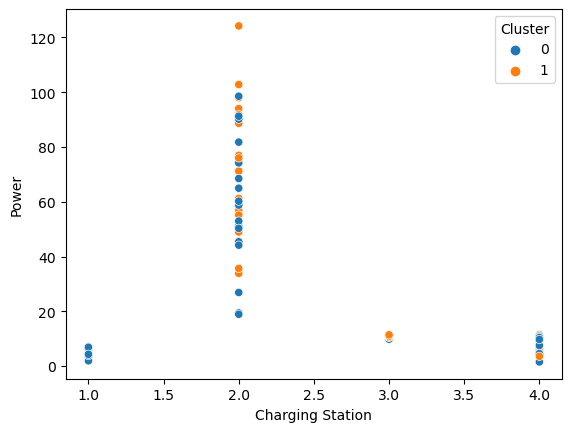

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecionar as variáveis para o modelo K-Means
X = EV[['Power', 'Charging Station','Day of Week', 'Period of Day','Temp', 'Month',  'Season', 'Período Escolar']]

# Substituir valores infinitos
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
print(X)

# Normalização dos dados
scaler = StandardScaler()
X_kmeans = scaler.fit_transform(X)

# Escolha do número de clusters 
num_clusters = 2

# Aplicação do K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_kmeans)

#sns.scatterplot(x='Total Energy (kWh)', y='Duration (min)', hue = 'Cluster', data=X)
#sns.scatterplot(x='Period of Day', y='Power', hue = 'Cluster', data=X)
sns.scatterplot(x='Charging Station', y='Power', hue = 'Cluster', data=X)
#sns.pairplot(X, hue='Cluster')

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


A = X[['Duration (min)','Charging Station','Total Energy (kWh)','Temp', 'Plus', 'Period of Day', 'Day of Week', 'Month',  'Season']]
print(A)

# Substituir valores infinitos
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
X.reset_index(drop=True, inplace=True)
# Remover linhas que contenham valores NaN
A = A.dropna()
#print(X)

# Features e TARGET_VARIABLE
y = A['Total Energy (kWh)']
X = A[['Duration (min)','Power','Temp', 'Plus','Day of Week', 'Month','Season', 'Charging Station']]


# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train, X_test, y_train, y_test)

# Inicialização e treino modelo de Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Obtenha a importância das características
importancia_caracteristicas = model.feature_importances_

# Exiba a importância das características
for nome_variavel, importancia in zip(X.columns, importancia_caracteristicas):
    print(f'{nome_variavel}: {importancia}')

# Exiba um gráfico de barras para visualizar a importância das características
plt.bar(X.columns.astype(str), importancia_caracteristicas)
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.show()

# Fazendo previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Visualização das previsões em comparação com os valores reais
print(predictions)

     Duration (min)      Power   Temp  Plus  Day of Week  Month  Season  \
0           224.517  10.740389  18.25  0.00            3      5       2   
1             6.167  33.857629  21.50  0.00            3      5       2   
2            43.467  56.843122  21.50  0.00            2      5       2   
3            12.100  71.107438  21.50  0.00            5      5       2   
5            21.933  35.672275  20.25  0.00            3      4       2   
..              ...        ...    ...   ...          ...    ...     ...   
96          260.017  10.921594  20.00  0.03            5      7       3   
97           35.300  44.158640  17.00  0.00            5      7       3   
98           22.550  76.017738  18.00  0.00            3      6       3   
99          237.100  11.420498  17.00  0.00            3      6       3   
100         321.983   3.577829  18.00  0.00            2      6       3   

     Charging Station  
0                 3.0  
1                 2.0  
2                 2.0  
3  

KeyError: "['Total Energy (kWh)', 'Period of Day'] not in index"

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = X[['Power','Temp', 'Plus','Day of Week', 'Season', 'Month', 'Período Escolar','Charging Station' ]]
y = EV['Total Energy (kWh)'] 

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino do modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsoes no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(predictions)

Mean Squared Error (MSE): 299.2039167314627
R-squared (R2): 0.05116078792678669
[35.46745788 22.36856988 21.52486417 29.01477652 32.79338971 24.19654188
 26.2506816  37.74998428 25.22924473 14.59342481 24.66837302 31.65125548
 25.41362463 25.43462526 26.54660958 23.34342482 28.00818939 36.42849561
 32.93976505 29.36597778 32.82467123 24.68373454 17.70272541 15.71452174]


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = X[['Power','Temp', 'Plus','Day of Week', 'Season', 'Month', 'Período Escolar']]
y = EV['Total Energy (kWh)'] 

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino modelo de XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Visualização das previsões em comparação com os valores reais
print(predictions)

Mean Squared Error: 192.04113201553102
R-squared (R2): 0.3909967543947478
[22.329578   0.9264268 28.58997   32.465862  31.411291  14.912333
 20.061398  38.005123  26.645414  28.40756   24.693943  20.64214
 37.533913  27.641397  31.281353  33.732285  42.212563  29.495653
  7.4915905 20.214037  30.580912  10.252189  -2.6513827  2.0192585]


In [19]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Seleção de características e variável de resposta
X = X[['Power','Temp', 'Plus','Day of Week', 'Season', 'Month', 'Período Escolar']]
y = EV['Total Energy (kWh)'] 

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados (é uma boa prática para redes neurais)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construção do modelo de rede neural
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Camada de saída para uma tarefa de regressão
])

# Compilação do modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# previsões no conjunto de teste
predictions = model.predict(X_test_scaled).flatten()

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2): {r2}')
print(predictions)

KeyError: ('Total Energy (kWh)', 'Period of Day')

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Substitua as colunas X e y conforme necessário

X = X[['Power','Temp', 'Plus','Day of Week', 'Season', 'Month', 'Período Escolar']]
y = EV['Total Energy (kWh)']

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino do modelo KNN para regressão
knn_model = KNeighborsRegressor(n_neighbors=5)  # Você pode ajustar o número de vizinhos conforme necessário
knn_model.fit(X_train, y_train)

# Previsões no conjunto de teste
predictions = knn_model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(predictions)

ValueError: Found input variables with inconsistent numbers of samples: [114, 117]